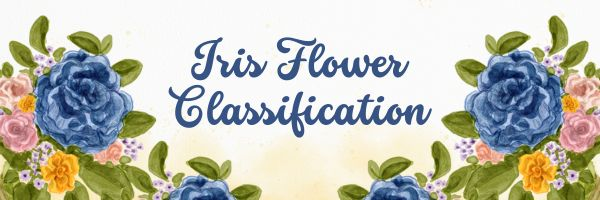

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%;;padding: 0px; border-bottom: 3px solid #4F200D">Importing modules and libraries</p>

In [1]:
# Data Analysis and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import cm

# Statistical Analysis
from scipy.stats import chi2_contingency

# Data Preprocessing and Feature Scaling
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PowerTransformer 
from sklearn.model_selection import train_test_split, GridSearchCV

# Stats models
import statsmodels.api as sm

# Scikit-learn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Model Evaluation Metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')
#c1=cm.get_cmap('Paired')
c1=cm.get_cmap('jet')
from sklearn.preprocessing import LabelEncoder

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%;padding: 0px; border-bottom: 3px solid #4F200D">Loading Data</p>

In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%;;padding: 0px; border-bottom: 3px solid #4F200D">Data Preprocessing</p>

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    
    
    
    
- **No duplicates and Null Values in the Dataset**

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%;padding: 0px; border-bottom: 3px solid #4F200D">Data Visualisation</p>

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Species Frequency</p>


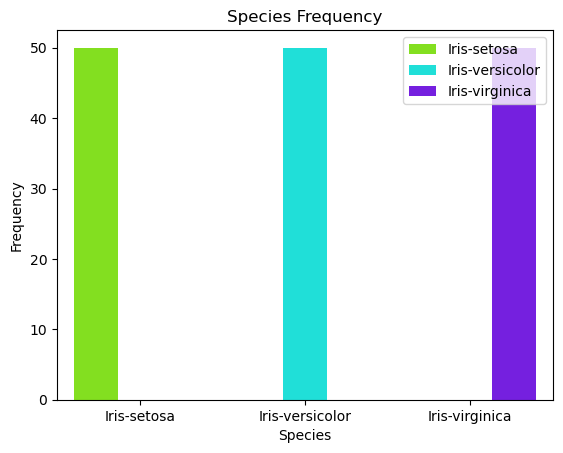

In [8]:
sb.countplot(data=df,x='Species',hue='Species',palette='hsv')
plt.ylabel('Frequency')
plt.title('Species Frequency')
plt.legend()
plt.show()

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Sepal Length Vs Sepal Width</p>


Text(0.5, 1.0, 'Sepal Length Vs Sepal Width')

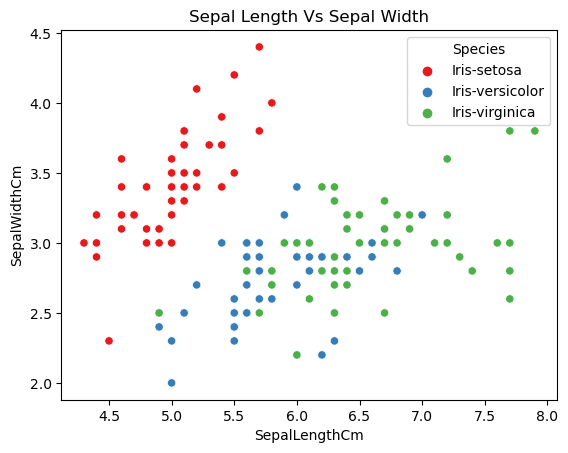

In [9]:
sb.scatterplot(data=df,x='SepalLengthCm',y='SepalWidthCm',hue='Species',palette='Set1')
plt.title('Sepal Length Vs Sepal Width')

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Petal Length Vs Petal Width</p>


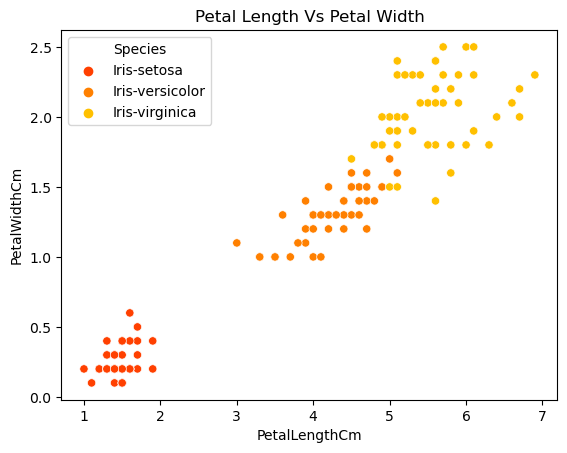

In [10]:
sb.scatterplot(data=df,x='PetalLengthCm',y='PetalWidthCm',hue='Species',palette='autumn')
plt.title('Petal Length Vs Petal Width')
plt.show()

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Petal Width Distribution</p>


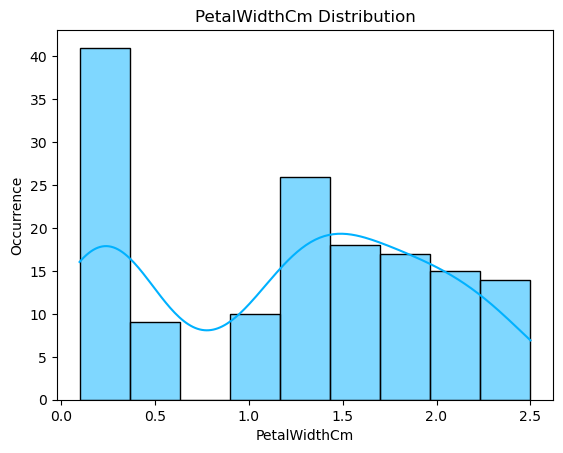

In [11]:
sb.histplot(df['PetalWidthCm'],kde=True,color=c1(0.3))
plt.ylabel('Occurrence')
plt.title('PetalWidthCm Distribution')
plt.show()

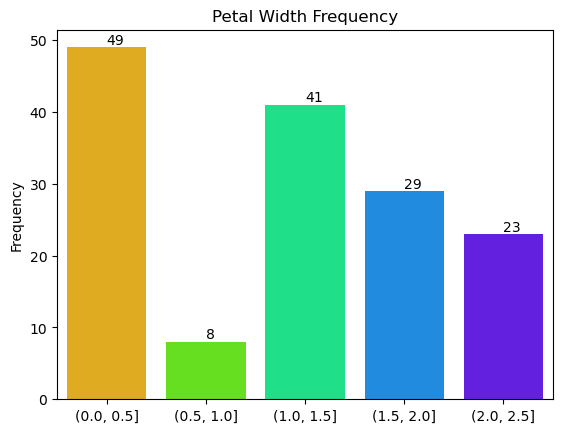

In [12]:
bins=[0,0.5,1,1.5,2,2.5]
val=pd.cut(df['PetalWidthCm'],bins=bins).value_counts()
sb.barplot(x=val.index,y=val,palette='gist_rainbow')
plt.ylabel('Frequency')
plt.title('Petal Width Frequency')
for i,j in enumerate(val.sort_index()):
    plt.text(i,j,j,va='bottom')
plt.show()

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    
    
    
    
- **(0-0.5) and (1-2) range Petal Width (in cm) are maximum in dataset**

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Petal Length Distribution</p>


Text(0.5, 1.0, 'PetalLengthCm Distribution')

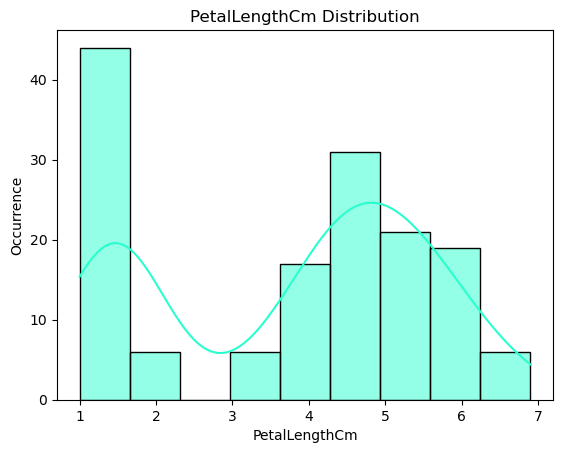

In [13]:
sb.histplot(df['PetalLengthCm'],kde=True,color=c1(0.4))
plt.ylabel('Occurrence')
plt.title('PetalLengthCm Distribution')

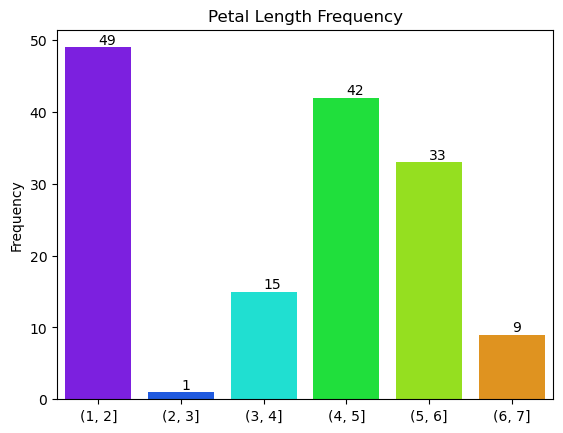

In [14]:
bins=[x for x in range(1,8)]
val=pd.cut(df['PetalLengthCm'],bins=bins).value_counts()
sb.barplot(x=val.index,y=val,palette='gist_rainbow_r')
plt.ylabel('Frequency')
plt.title('Petal Length Frequency')
for i,j in enumerate(val.sort_index()):
    plt.text(i,j,j,va='bottom')


<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    
    
    
    
- **(1-2) and (4-6) range Petal Length (in cm) are maximum in dataset**

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Sepal Length Distribution</p>


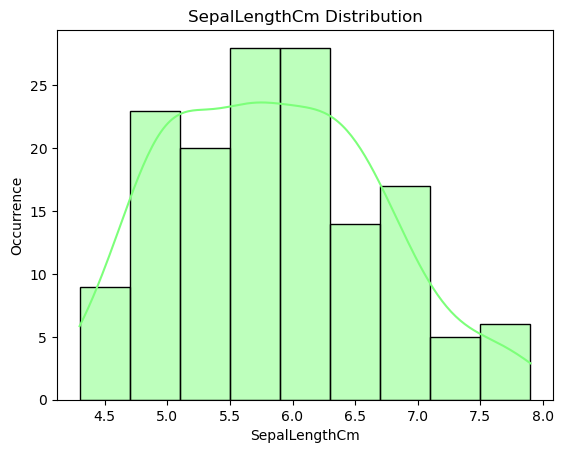

In [15]:
sb.histplot(df['SepalLengthCm'],kde=True,color=c1(0.5))
plt.ylabel('Occurrence')
plt.title('SepalLengthCm Distribution')
plt.show()

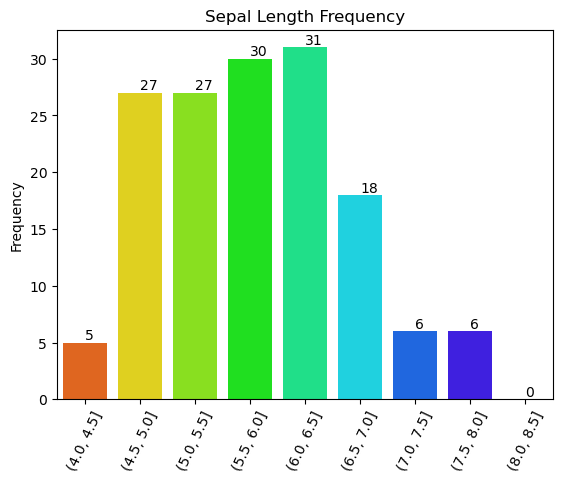

In [16]:
bins=[x for x in np.arange(4,9,0.5)]
val=pd.cut(df['SepalLengthCm'],bins=bins).value_counts()
sb.barplot(x=val.index,y=val,palette='gist_rainbow')
plt.ylabel('Frequency')

for i,j in enumerate(val.sort_index()):
    plt.text(i,j,j,va='bottom')
plt.xticks(rotation=65)
plt.title('Sepal Length Frequency')
plt.show()

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    
    
    
    
- **4-7 range sepal length (in cm) are maximum in dataset**

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Sepal Width Distribution</p>


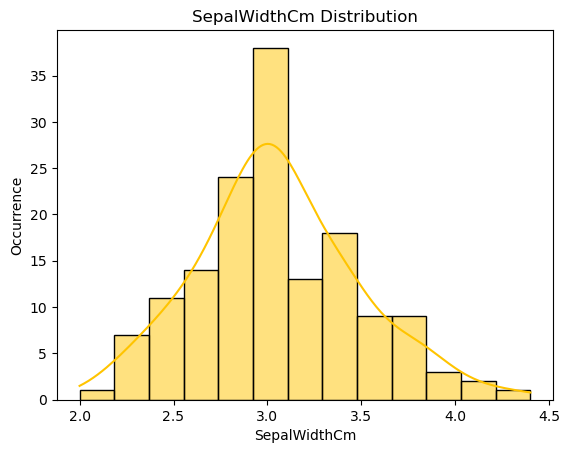

In [17]:
sb.histplot(df['SepalWidthCm'],kde=True,color=c1(0.7))
plt.ylabel('Occurrence')
plt.title('SepalWidthCm Distribution')
plt.show()

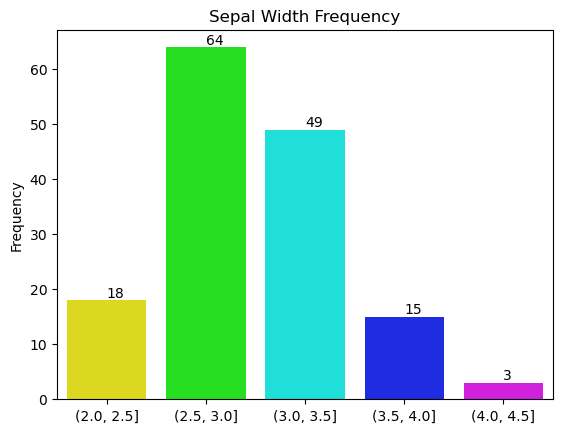

In [18]:
bins=[2,2.5,3,3.5,4,4.5]
val=pd.cut(df['SepalWidthCm'],bins=bins).value_counts()
sb.barplot(x=val.index,y=val,palette='hsv')
plt.ylabel('Frequency')
plt.title('Sepal Width Frequency')
for i,j in enumerate(val.sort_index()):
    plt.text(i,j,j,va='bottom')
plt.show()   

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    
    
    
    
- **2.5-3.5 range sepal width (in cm) are maximum in dataset**

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Heatmap For Correlation</p>

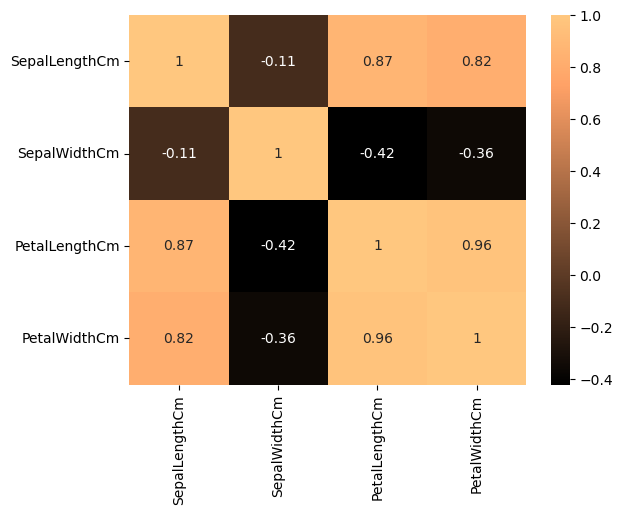

In [19]:
sb.heatmap(data=df.drop(['Species','Id'],axis=1).corr(),annot=True,cmap='copper')
plt.show()

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    
    
    
    
- **Only Sepal Width is negatively correlated**
- **Other Features are strongly correlated with each other**

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Pair Plot</p>


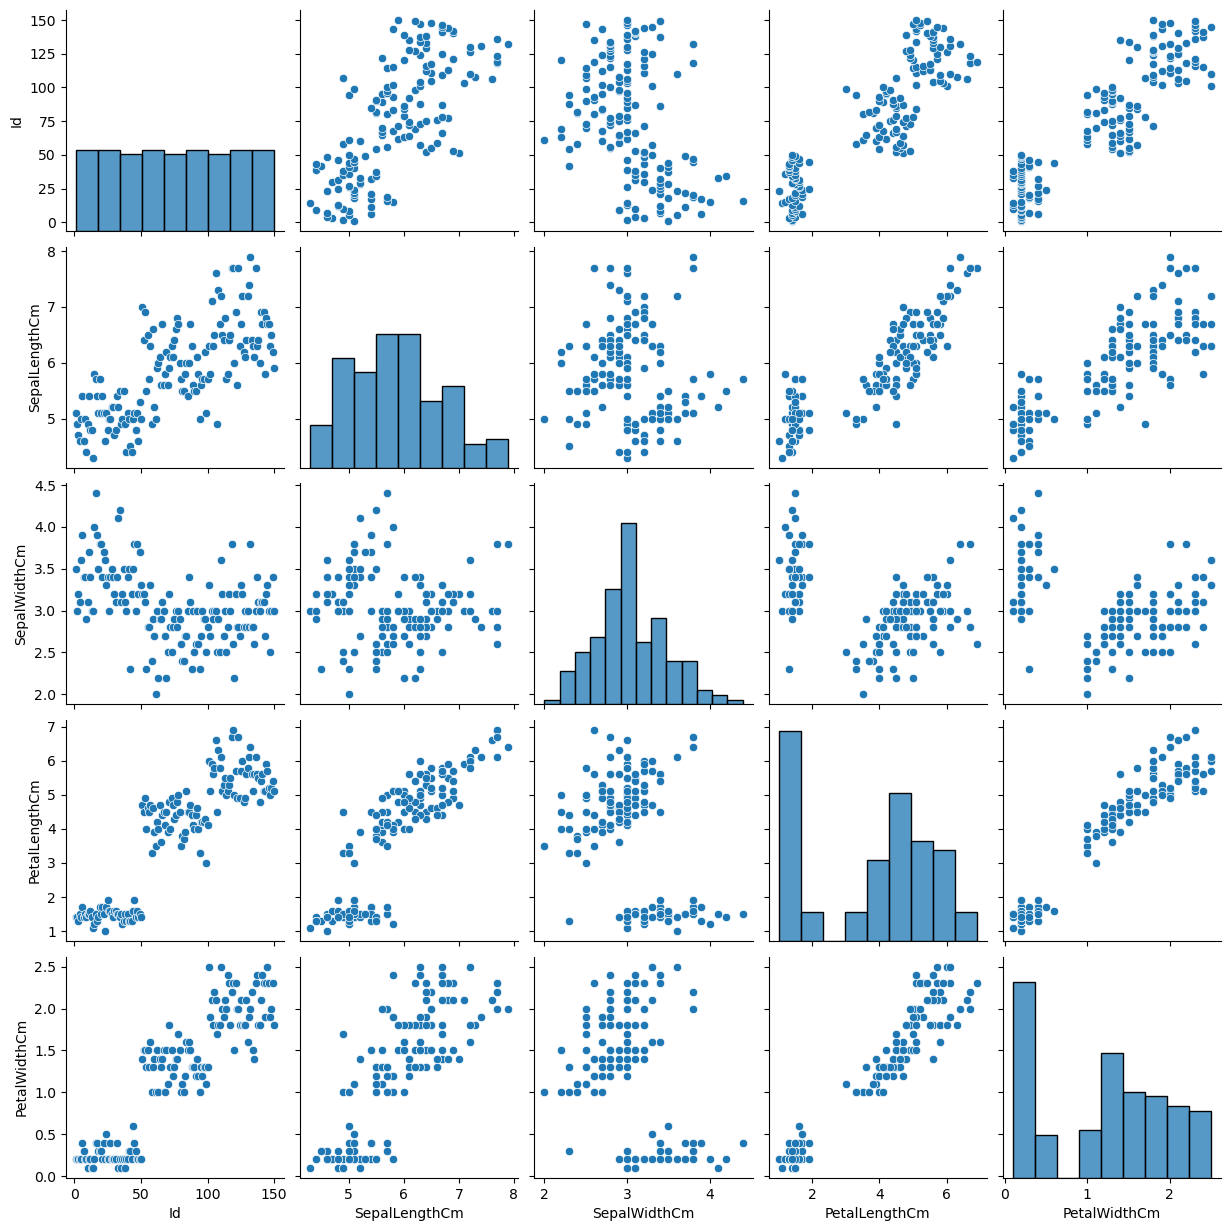

In [20]:
sb.pairplot(data=df)
plt.show()

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    
    
    
    
- **Here the dataset is small.So we perform pairplot for better understanding of data**

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%;padding: 0px; border-bottom: 3px solid #4F200D">Model Building</p>

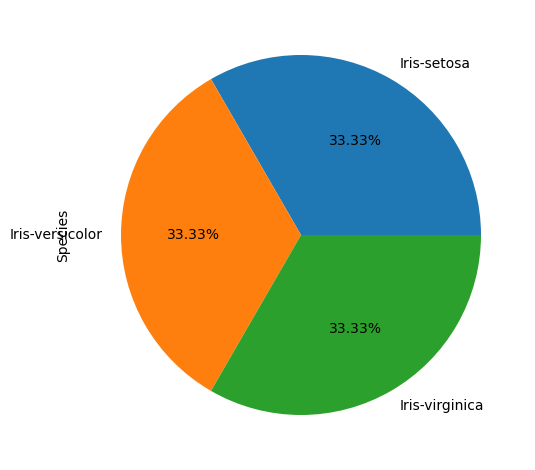

In [21]:
df['Species'].value_counts().plot.pie(autopct='%.2f%%')
plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    
    
    
    
- **The target classes are balanced**

In [22]:
x = df.drop('Species',axis=1)
y = df['Species']

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=1)

In [24]:
print(xtrain.shape)
print(xtest.shape)

(105, 5)
(45, 5)


In [25]:
perf_score_test = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

def update_performance_test(name, model, test, pred):
    global perf_score_test
    perf_score_test = perf_score_test.append({
        'Model': name,
        'Accuracy': accuracy_score(test, pred),
        'Precision': precision_score(test, pred,average='weighted'),
        'Recall': recall_score(test, pred,average='weighted'),
        'F1 Score': f1_score(test, pred,average='weighted')},ignore_index=True)


In [26]:
model = {"KNN": KNeighborsClassifier(),
         "MultinomialNB": MultinomialNB(),
        "DecisionTreeClassifier": DecisionTreeClassifier()}

for clf,clf_names in zip(model.values(),model.keys()):
    clf.fit(xtrain,ytrain)
    ypred = clf.predict(xtest)
    update_performance_test(clf_names,clf, ytest,ypred)

perf_score_test

,Model,Accuracy,Precision,Recall,F1 Score
0,KNN,1.000000,1.000000,1.000000,1.000000
1,MultinomialNB,0.822222,0.840033,0.822222,0.824173
2,DecisionTreeClassifier,0.977778,0.979365,0.977778,0.977872


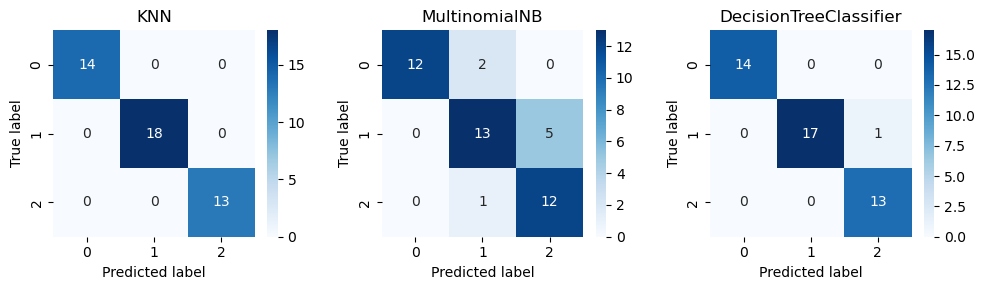

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

for (clf_name, clf), ax in zip(model.items(), axes.flatten()):
    cm = confusion_matrix(ytest, clf.predict(xtest))
    sb.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set(title=clf_name, ylabel='True label', xlabel='Predicted label')

plt.tight_layout()
plt.show()

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%;padding: 0px; border-bottom: 3px solid #4F200D">Results</p>

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    
    
    
    
- **We Built models using three algorithms:**
    - Knn classifier
    - Multinomial Naive Bayes
    - Decision Tree classifier
- **Among the Three the base model KNN classifer itself predicts accurately the flower classes**
- **Since the model has perfect patterns for training the model, it overfits and outperforms**